In [1]:
### Project Evaluation Phase 1
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase 1" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 1
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [2]:
print("---------------------------------\n")
print("\033[1m" + "HR Analytics Project\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

HR Analytics Project

---------------------------------



# Project Objectives

Understanding and addressing attrition in HR (Human Resources) is a crucial aspect of HR analytics. High attrition rates can be costly and disruptive to an organization, making it essential to identify the underlying causes and develop strategies to mitigate them.

***This project is aimed at understanding how attrition affect companies? and how does HR Analytics help in analyzing attrition?*** 

# Loading Libraries

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_absolute_error, r2_score, explained_variance_score, max_error, classification_report
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential

# Loading Dataset

In [47]:
data = pd.read_csv('HR-Employee-Attrition.csv')

# About the Data

In [48]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* **Column Names:** The dataset contains 35 columns, each representing different attributes or features.

* **Data Types:** Most columns are of type int64, indicating they contain numerical data. Some columns, such as "Attrition," "BusinessTravel," "Department," "EducationField," "Gender," "JobRole," "MaritalStatus," "Over18," and "OverTime," are of type object, suggesting they likely contain categorical or text data.

* **Non-Null Count:** There are no missing values (null values) in any of the columns. Each column has 1470 non-null entries, indicating that the dataset is complete in terms of data availability.

In [7]:
# Display statistical summaries of the dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here are some key observations from the summary statistics of the dataset:

**1. Age Distribution:**
* The average age of employees in the dataset is approximately 36.9 years.
* The youngest employee is 18 years old, while the oldest is 60 years old.
* Most employees fall within the age range of 30 to 43 years, as indicated by the interquartile range (25th to 75th percentile).

**2. DailyRate:**
* The daily rate of pay for employees varies, with a mean value of approximately 802.49.
* The spread of daily rates is relatively high, as indicated by the standard deviation.

**3. DistanceFromHome:**
* On average, employees live at a distance of about 9.19 units from their workplace.
* The distances from home to work vary widely, with some employees living as close as 1 unit and others as far as 29 units away.

**4. Education:**
* The education levels of employees vary, with an average education level of approximately 2.91.
* Education levels are likely coded numerically, and the values may correspond to different education levels (e.g., 1 for high school, 2 for bachelor's degree, etc.).

**5. Environment Satisfaction:**
* The "EnvironmentSatisfaction" column appears to represent employee satisfaction with their work environment.
* The values range from 1 (low satisfaction) to 4 (high satisfaction).
* The mean satisfaction level is approximately 2.72, indicating a moderate level of satisfaction on average.

**6. JobInvolvement:**
* The "JobInvolvement" column represents employee involvement in their job roles.
* The values range from 1 (low involvement) to 4 (high involvement).
* The mean job involvement level is approximately 2.73, indicating a moderate level of job involvement on average.

These observations provide initial insights into the demographics and satisfaction levels of employees in the dataset. Further analysis and exploration can help uncover relationships between these factors and employee attrition, which is a key aspect of HR Analytics. 

# Initial Exploratory Data Analysis (EDA)

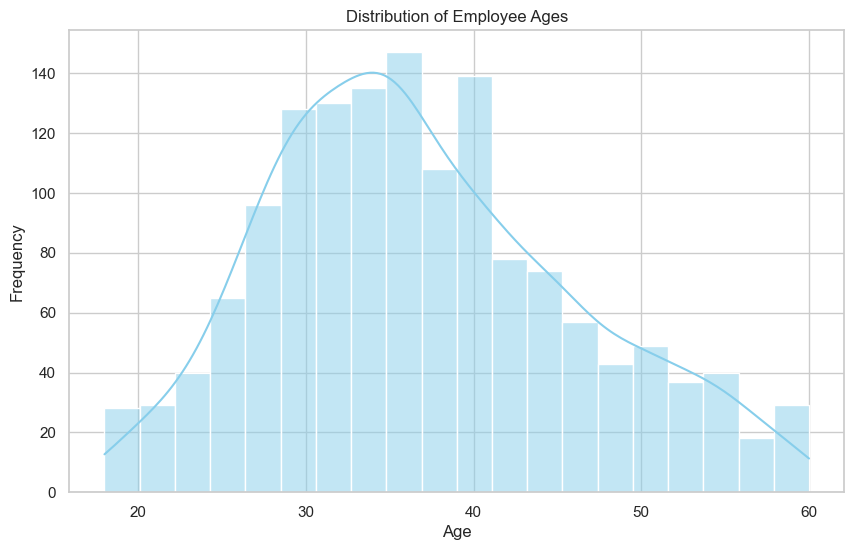

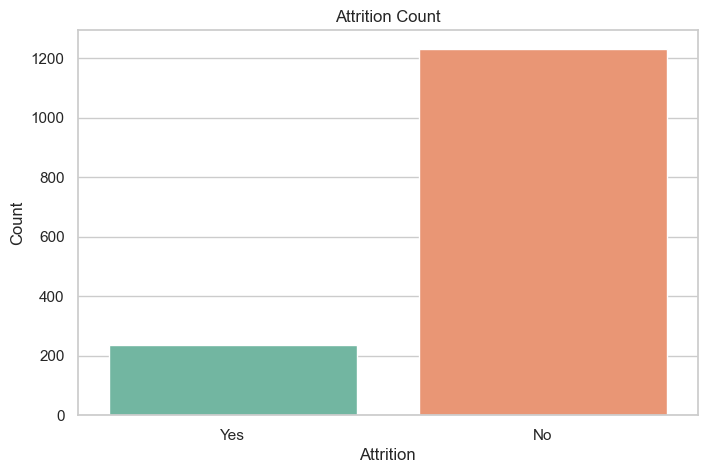

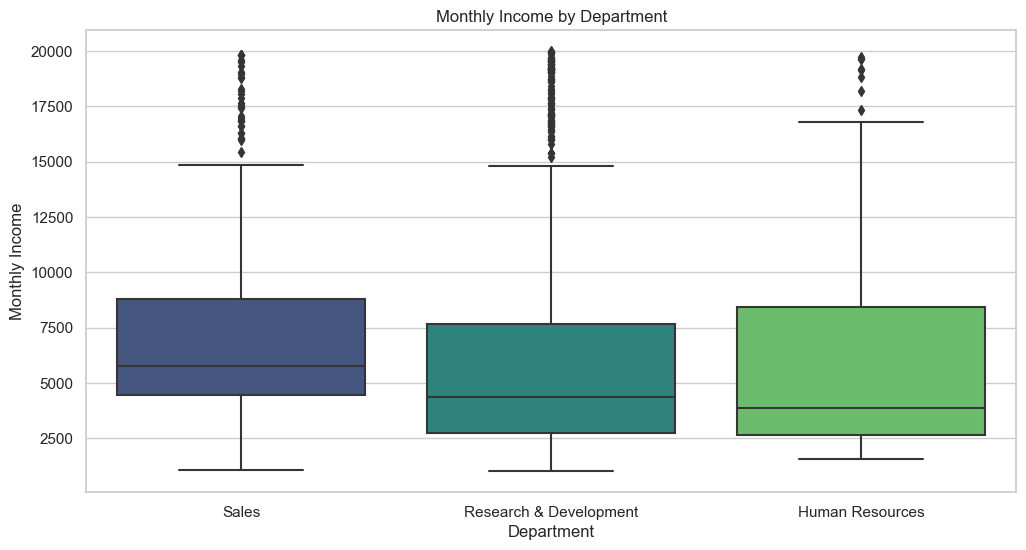

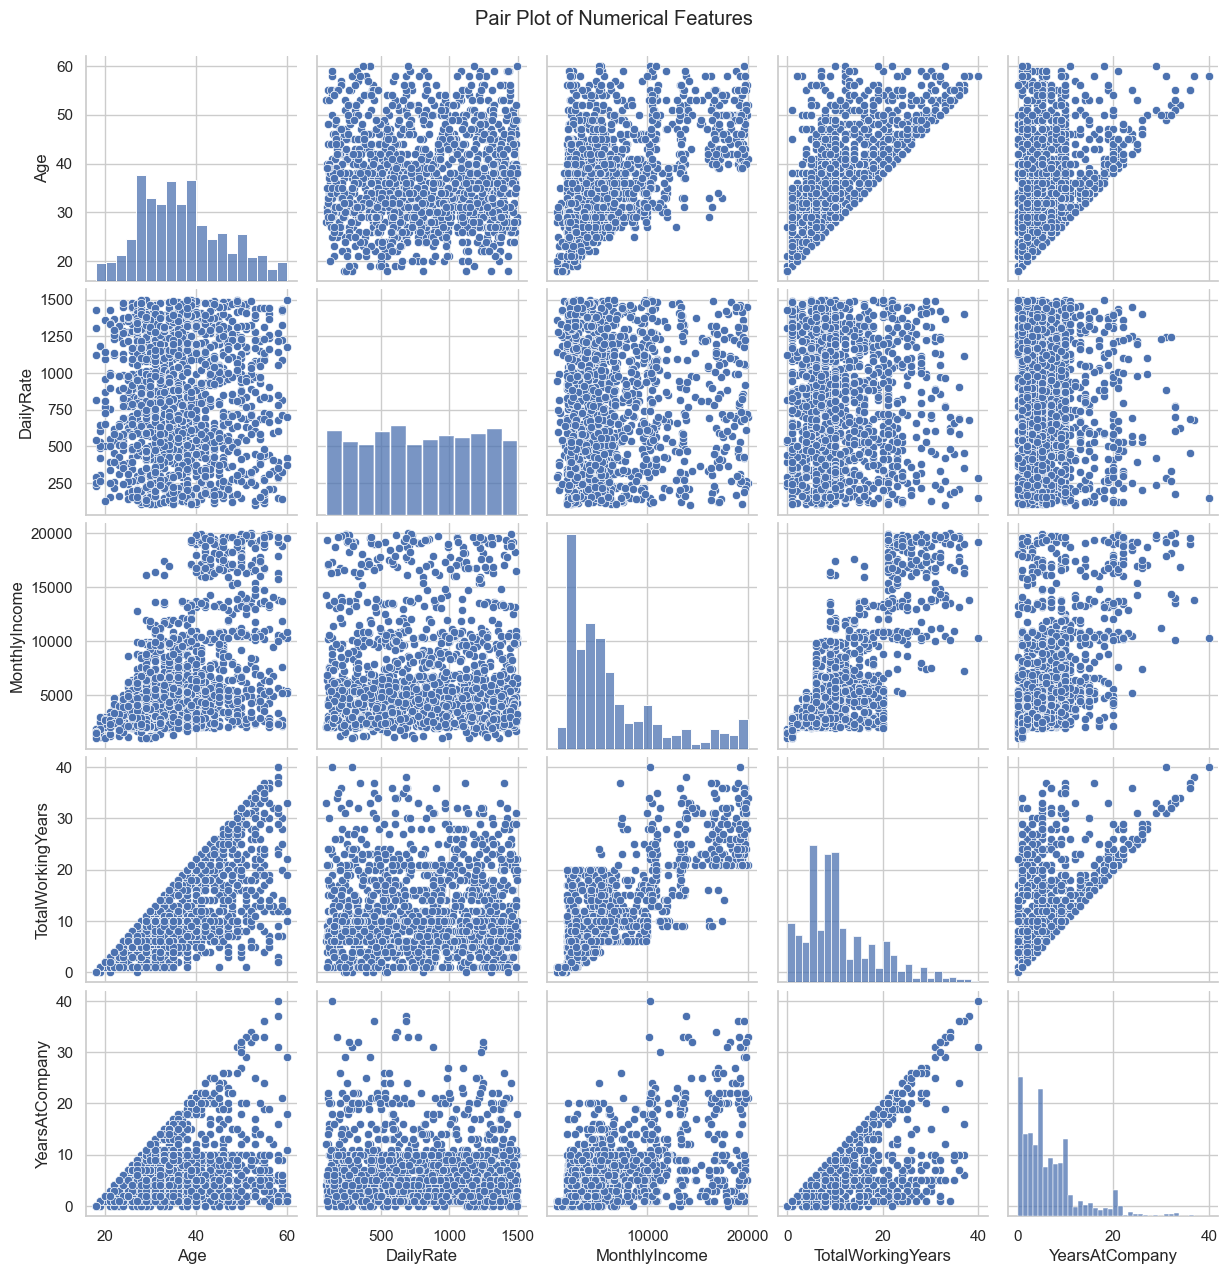

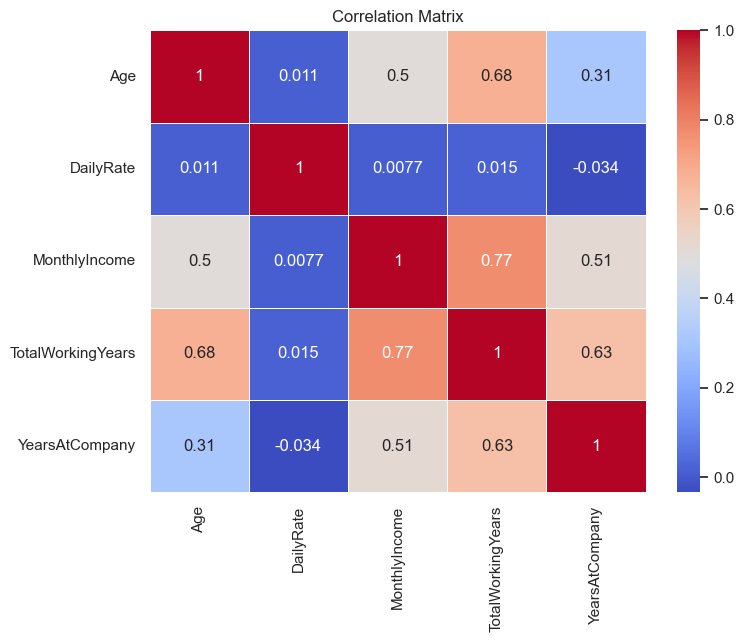

In [10]:
# Set the style for visualizations
sns.set(style="whitegrid")

# Plot a histogram of employee ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot a count plot for attrition
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Attrition'], palette='Set2')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# Plot a box plot of monthly income by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=data, palette='viridis')
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

# Plot a pair plot for selected numerical columns
numerical_columns = ['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Calculate and plot the correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**1. Employee Age Distribution:**
* The distribution of employee ages in the histogram is roughly symmetrical, i.e the near "bell-shaped", indicates that the data is centered around a central value range (30-40). 
* In the context of employee ages, the peakages seem to be between 30 and 40 years.
* After the peak ages, there is a gradual decline in the count of employees as age increases.
* There's a presence of younger employees in the dataset, with counts increasing from ages 18 to 30, showing that the organization also employs individuals in their late teens and twenties.
* There is also an indication of concentration of employees in their mid-thirties.
* There are fewer employees in the older age groups (e.g., above 50).

*In summary, while the distribution of employee ages exhibits some characteristics of normality, such as central tendency and rough symmetry, it deviates from a perfect normal distribution in terms of multimodality, skewness, and kurtosis. It is not a textbook example of a normal distribution but rather a distribution with its own unique shape.*

**2. Attrition Count:**
* The majority of employees have not experienced attrition, while a smaller proportion have. This is an example of class imbalance.
* The class imbalance is evident because there are substantially fewer instances of attrition compared to no attrition. Class imbalance can have implications for machine learning and statistical modeling, especially in predictive tasks like attrition prediction. 

**3. Monthly Income BY Department:**
* The notable observation of outliers in each department from the box plot provides insights into the variability of monthly incomes within different areas of the organization. 
* Outliers can be indicative of various factors, such as seniority, specialized roles, or other unique circumstances that lead to income variations. Further investigation into the specific causes of these outliers within each department may be valuable for HR analytics and decision-making.

**4. Correlation Matrix:**
* Age and total work experience (TotalWorkingYears) are strongly correlated, indicating that employees with more years in the workforce tend to be older.
* Total work experience (TotalWorkingYears) has a strong positive correlation with monthly income, indicating that longer work experience is associated with higher incomes.
* Age and monthly income are moderately correlated, suggesting that older employees tend to have higher monthly incomes.
* Years at the company (YearsAtCompany) also has a moderate positive correlation with monthly income, indicating that longer tenure with the same company is associated with higher incomes.

These insights provide valuable information for HR analytics and talent management, as they can help organizations understand the relationships between age, experience, tenure, and income within their workforce.


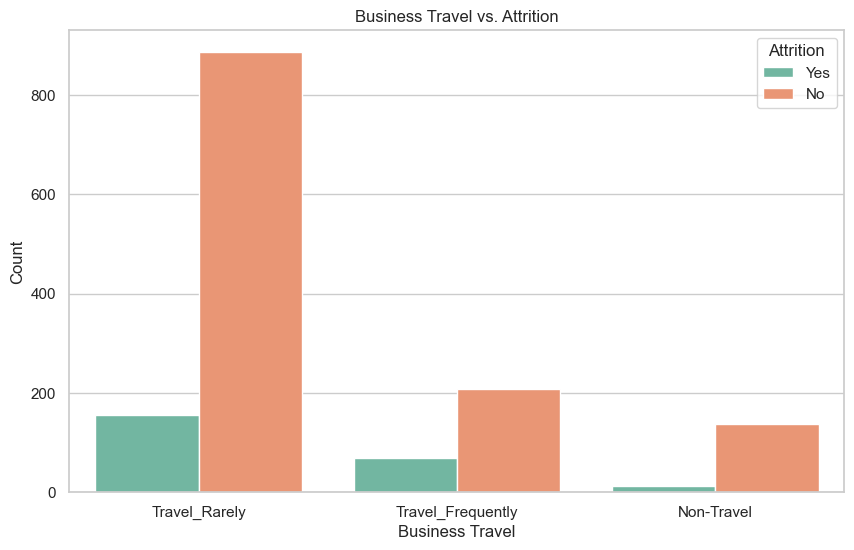

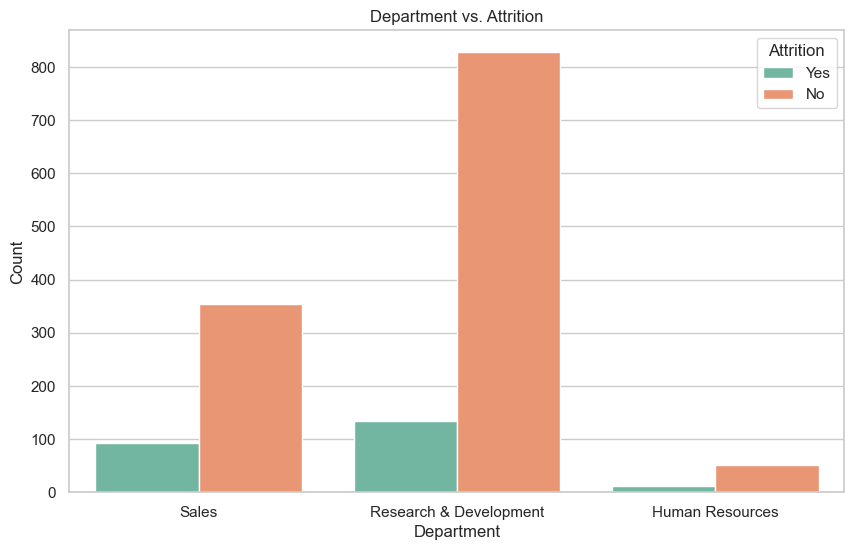

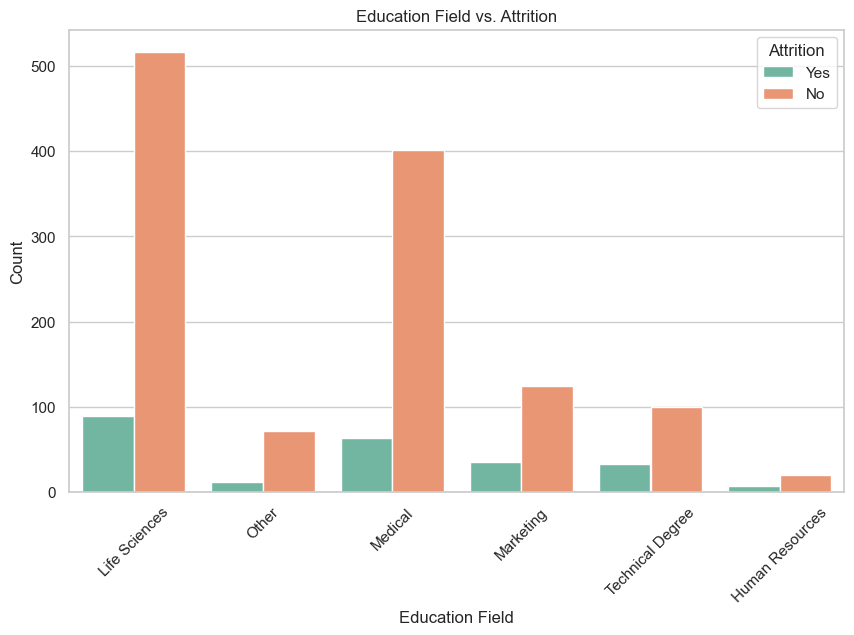

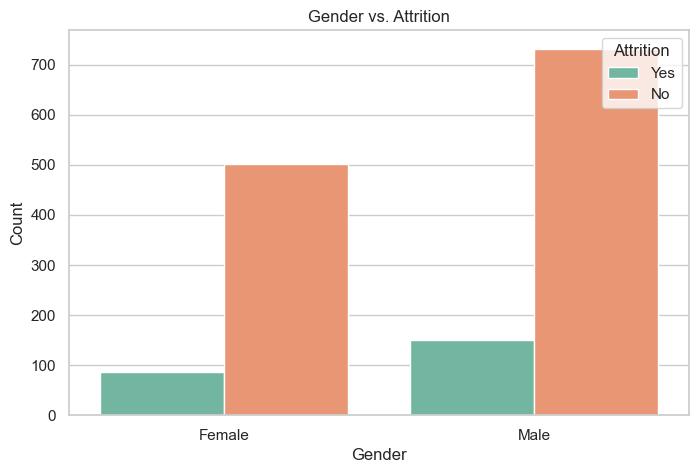

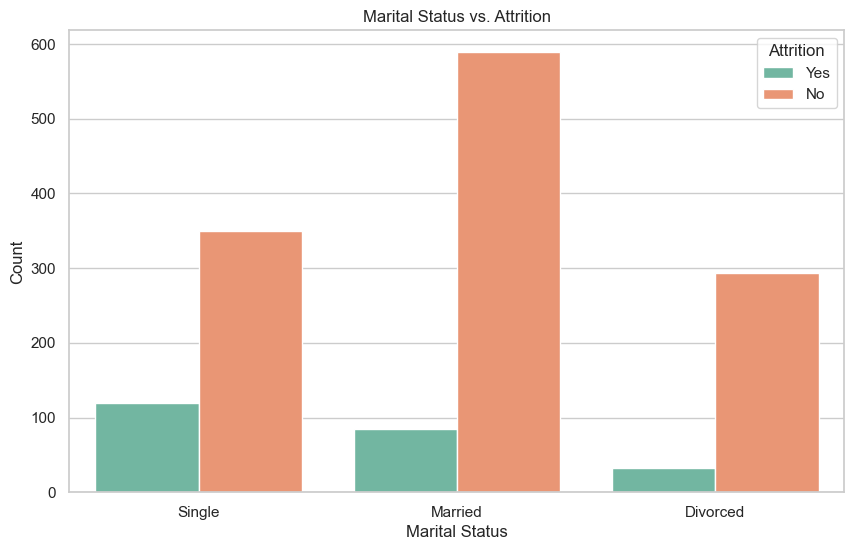

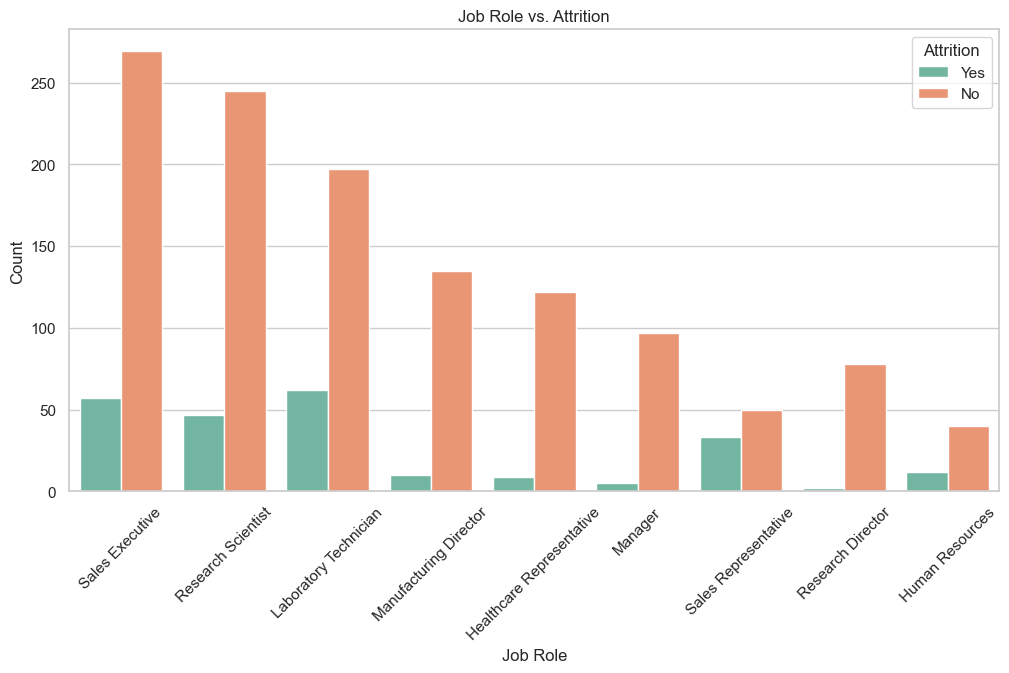

In [9]:
# Set the style for visualizations
sns.set(style="whitegrid")

# Plot a count plot for BusinessTravel vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data, palette='Set2')
plt.title('Business Travel vs. Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Plot a count plot for Department vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data, palette='Set2')
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Plot a count plot for EducationField vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data, palette='Set2')
plt.title('Education Field vs. Attrition')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Plot a count plot for Gender vs. Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Attrition', data=data, palette='Set2')
plt.title('Gender vs. Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Plot a count plot for MaritalStatus vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, palette='Set2')
plt.title('Marital Status vs. Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Plot a count plot for JobRole vs. Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set2')
plt.title('Job Role vs. Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Approach to Understanding the Attrition in HR

****
Both classification and regression models will be built for this project. Building both classification and regression machine learning algorithms for this HR analytics project can be a valuable approach, especially as the dataset  dataset contains both numeric and categorical data. Each type of algorithm serves a different purpose, and using both can provide a comprehensive understanding of attrition and related factors. Below is the purpose and output for both models:

**1. Classification Algorithm (e.g., Logistic Regression, Random Forest, or XGBoost):**

**Purpose:** This classification algorithm can be used to predict whether an employee is likely to experience attrition (binary classification: Yes or No).

**Output:** The output will be a binary classification result (attrition or no attrition).

**2. Regression Algorithm (e.g., Linear Regression, Decision Tree Regression, or Random Forest Regression):**

**Purpose:** This regression algorithm can be used to predict a numerical target, such as predicting the number of months an employee is likely to stay with the company before experiencing attrition.

**Output:** The output will be a numerical prediction representing the expected duration of employment before attrition.

By building both types of models, we can gain a more comprehensive understanding of attrition. Classification helps you identify which employees are at risk, while regression provides insights into how long they might stay.


# Data Preprocessing For Classification Task

In [56]:
# Make a copy of the data for classification
data_classification = data.copy()

In [57]:
# Drop irrelevant columns, if any
columns_to_drop = ['EmployeeNumber']
data_classification = data_classification.drop(columns=columns_to_drop)

In [58]:
# Remove the 'Over18' column from the dataset
data_classification.drop(columns=['Over18'], inplace=True)

In [61]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### Exploring Categorical Features

Count Distribution of Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64



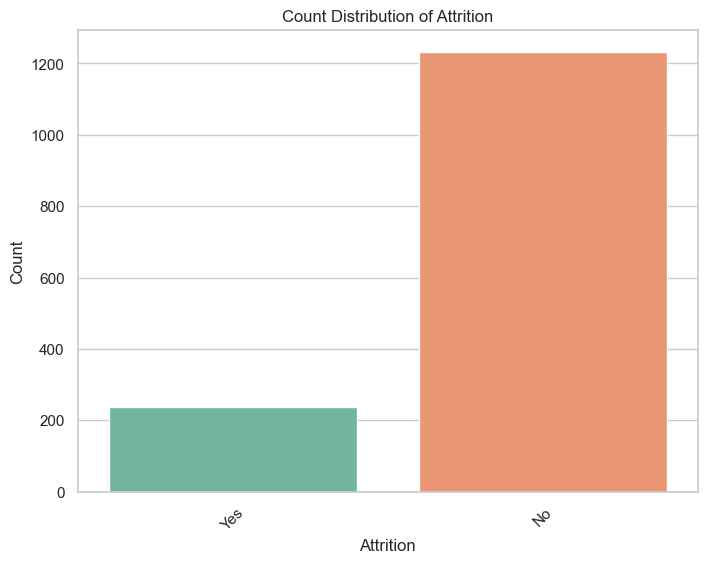

Count Distribution of BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



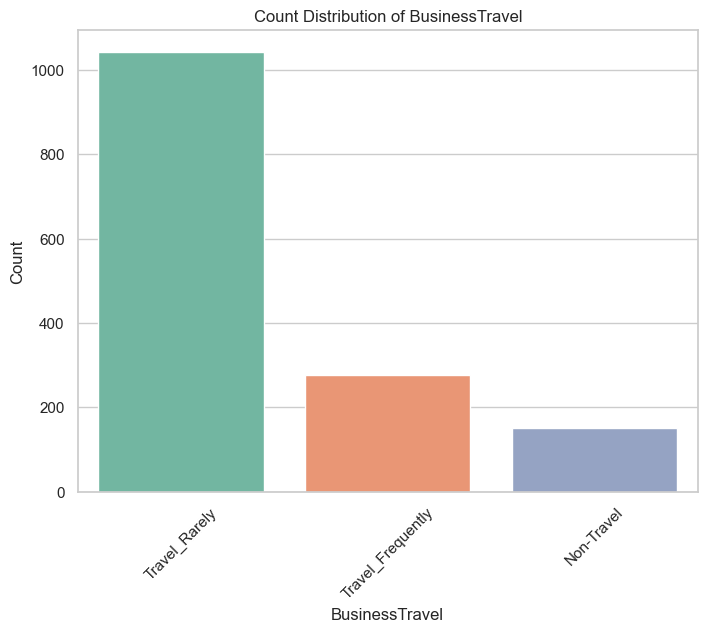

Count Distribution of Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



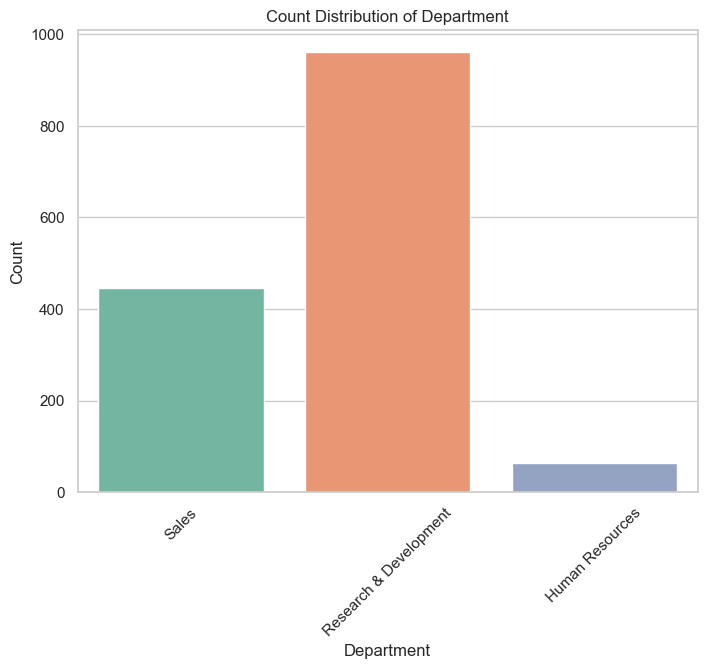

Count Distribution of EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



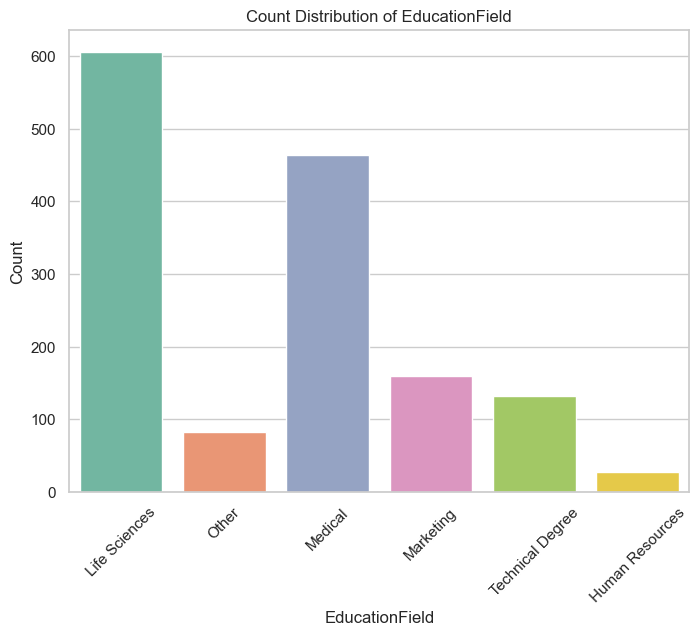

Count Distribution of Gender:
Male      882
Female    588
Name: Gender, dtype: int64



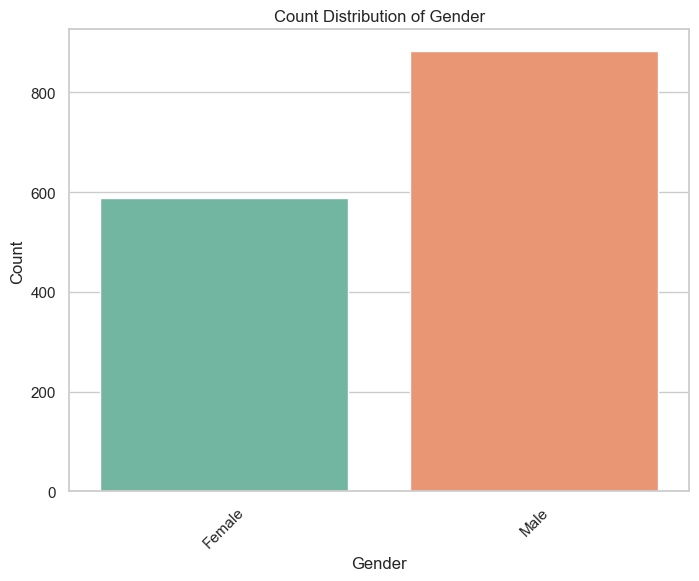

Count Distribution of JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



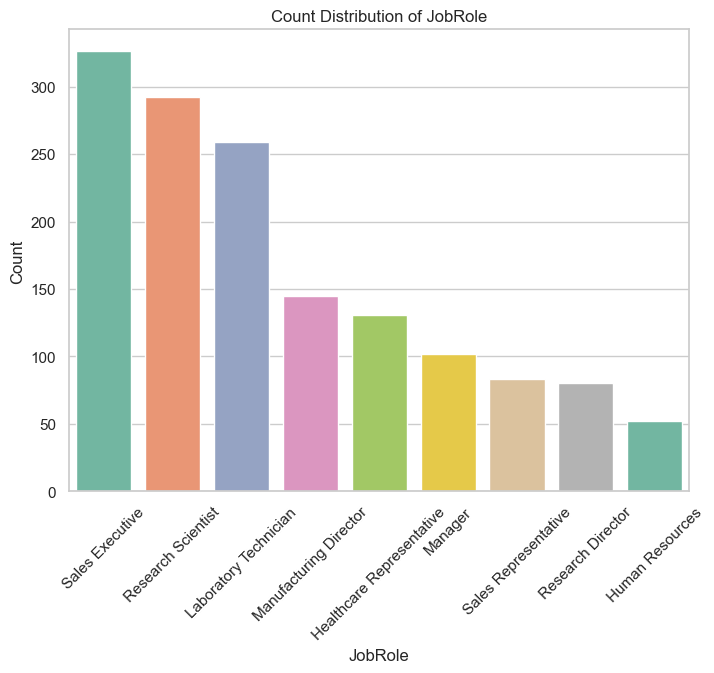

Count Distribution of MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



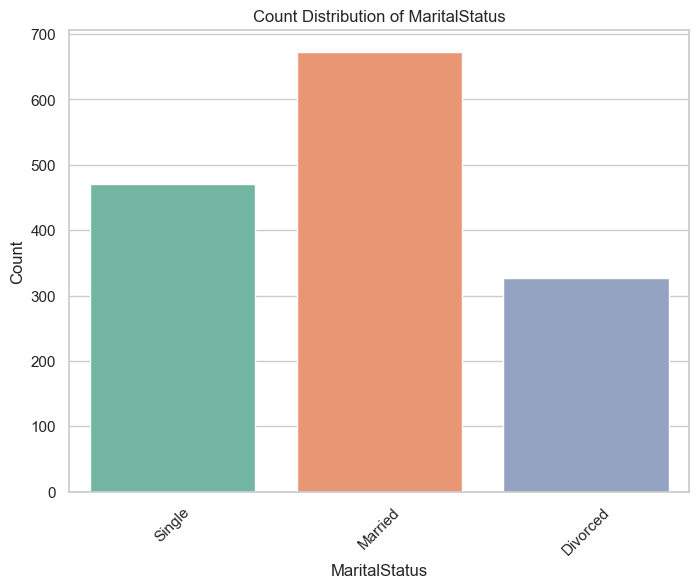

Count Distribution of OverTime:
No     1054
Yes     416
Name: OverTime, dtype: int64



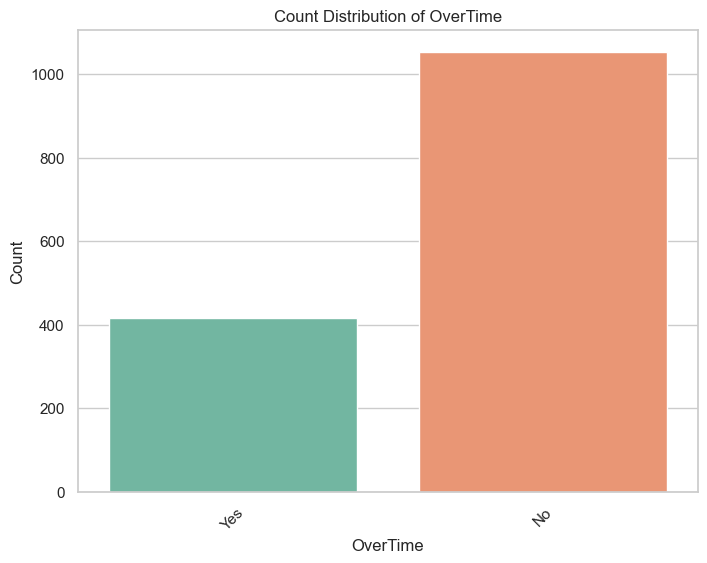

In [60]:
# Define the list of categorical columns (excluding 'Over18')
categorical_columns = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # Calculate and print the count distribution
    count_distribution = data_classification[column].value_counts()
    print(f'Count Distribution of {column}:\n{count_distribution}\n')
    
    # Plot the count distribution
    sns.countplot(data=data_classification, x=column, palette='Set2')
    plt.title(f'Count Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()


There is a class imbalance across all categorical features 

### Encoding Categorical Features 

In [71]:
# Select all categorical columns (excluding 'Attrition' which is the target)
categorical_columns = data_classification.select_dtypes(include=['object']).columns.drop(['Attrition'])

# Create a DataFrame with only the categorical columns
data_categorical = data_classification[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical data
data_encoded = encoder.fit_transform(data_categorical)

# Create a DataFrame from the encoded data with column names
encoded_columns = encoder.get_feature_names_out(categorical_columns)
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns)

# Concatenate the encoded data with the original DataFrame
data_classification = pd.concat([data_classification, data_encoded_df], axis=1)

# Drop the original categorical columns
data_classification.drop(columns=categorical_columns, inplace=True)

# Now, 'data_classification' contains the encoded categorical features.


In [72]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   object 
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeCount                      1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [74]:
data_classification.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,1,2,94,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,1,4,92,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,1,1,40,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Handling Class Imbalance Using Synthetic Minority Over-sampling Technique (SMOTE) 

In [90]:
# Separate features and target variable for classification
X_classification = data_classification.drop(columns=['Attrition'])
y_classification = data_classification['Attrition']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes in the target variable
X_train_classification_resampled, y_train_classification_resampled = smote.fit_resample(X_train_classification, y_train_classification)

# Now, X_train_classification and y_train_classification contain the balanced data


In [100]:
X_train_classification_resampled

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
1,49,279,8,1,1,3,61,2,2,2,...,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,37,1373,2,2,1,4,92,2,1,3,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
3,33,1392,3,4,1,4,56,3,1,3,...,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
4,27,591,2,1,1,1,40,3,1,2,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,31,759,10,3,1,3,69,3,1,3,...,0.671455,0.0,0.0,0.0,0.328545,0.000000,0.000000,0.671455,0.328545,0.328545
2462,40,1070,17,3,1,1,68,3,1,3,...,0.000000,0.0,0.0,0.0,0.316922,0.683078,0.000000,0.316922,0.683078,1.000000
2463,30,608,17,3,1,1,66,1,1,3,...,0.000000,0.0,0.0,0.0,0.120731,0.879269,0.000000,1.000000,0.000000,1.000000
2464,22,324,5,1,1,2,32,2,1,1,...,0.258432,0.0,0.0,0.0,0.000000,0.000000,0.741568,0.000000,1.000000,0.000000


Yes    1233
No     1233
Name: Attrition, dtype: int64


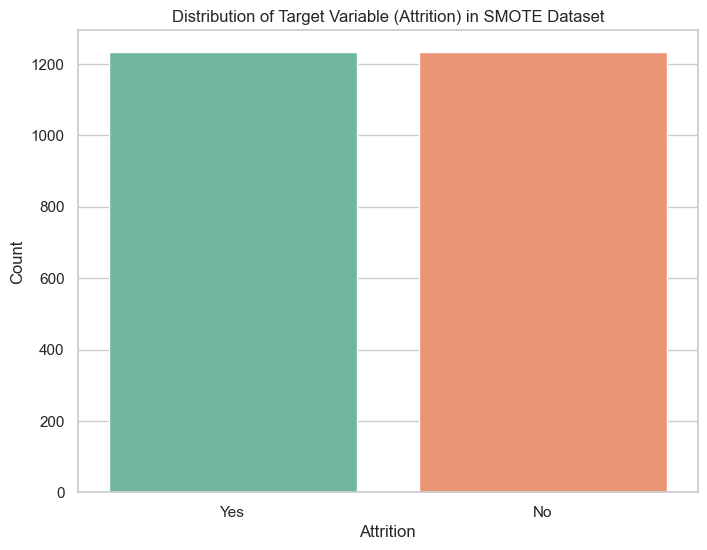

In [98]:
# Calculate the count distribution of 'Attrition' in the SMOTE dataset
attrition_counts = y_train_classification_resampled.value_counts()
print(attrition_counts)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')
plt.title('Distribution of Target Variable (Attrition) in SMOTE Dataset')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


### Feature Scaling  

In [101]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the resampled feature data
X_train_classification_scaled = scaler.fit_transform(X_train_classification_resampled)

# Now, X_train_classification_scaled contains the scaled feature values


### Data Split 

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_classification_scaled, y_train_classification_resampled, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, and y_test contain the split data

# Classification Model

In [112]:
# Initialize the classifiers
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create a list of classifiers for iteration
classifiers = [logistic_regression, random_forest, svm_classifier, gradient_boosting]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report:\n{report}\n")


Classifier: LogisticRegression
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.85      0.86       250
         Yes       0.85      0.87      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494


Classifier: RandomForestClassifier
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.98      0.94       250
         Yes       0.97      0.89      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494


Classifier: SVC
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.94      0.93       250
         Yes       0.94      0.91   

* Logistic Regression achieved an accuracy of 0.86, indicating that it correctly classified 86% of the samples. It shows a relatively balanced performance between the "Yes" and "No" classes, with similar precision, recall, and F1-scores for both classes.
* Random Forest Classifier achieved the highest accuracy of 0.94, indicating strong performance. It has a high precision and recall for both classes, with an F1-score of 0.93 for "Yes" and 0.94 for "No." This model seems to be a strong performer.
* The Support Vector Classifier achieved an accuracy of 0.93, showing good overall performance. It has balanced precision, recall, and F1-scores for both classes, making it a reliable choice.
* The Gradient Boosting Classifier also achieved an accuracy of 0.93, indicating strong performance. It has high precision for both classes but a slightly lower recall for "Yes" compared to "No." The F1-scores are balanced for both classes.

***In summary, all four models show good performance, with accuracy scores ranging from 0.86 to 0.94. The Random Forest Classifier achieved the highest accuracy and a well-balanced F1-score for both classes, making it a strong candidate for this classification task.***